<a href="https://colab.research.google.com/github/Doclikam/Python-pydata/blob/main/food_carbon_footprint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing the required libraries**

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [64]:
url='https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-02-18/food_consumption.csv'
carbon_footprint=pd.read_csv(url, sep=',')



In [65]:
carbon_footprint.head(2)
carbon_footprint.shape
carbon_footprint.info()
carbon_footprint.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1430 entries, 0 to 1429
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        1430 non-null   object 
 1   food_category  1430 non-null   object 
 2   consumption    1430 non-null   float64
 3   co2_emmission  1430 non-null   float64
dtypes: float64(2), object(2)
memory usage: 44.8+ KB


Index(['country', 'food_category', 'consumption', 'co2_emmission'], dtype='object')

In [66]:
carbon_footprint.head(2)

east_africa=['Kenya',' Uganda','Tanzania', 'Rwanda','Ethiopia']

countries=carbon_footprint[carbon_footprint['country'].isin(east_africa)]
countries

,country,food_category,consumption,co2_emmission
902,Kenya,Pork,0.29,1.03
903,Kenya,Poultry,0.47,0.50
904,Kenya,Beef,9.54,294.38
905,Kenya,Lamb & Goat,1.86,65.14
906,Kenya,Fish,4.27,6.82
907,Kenya,Eggs,1.84,1.69
908,Kenya,Milk - inc. cheese,94.86,135.12
909,Kenya,Wheat and Wheat Products,34.65,6.61
910,Kenya,Rice,12.94,16.56
911,Kenya,Soybeans,0.20,0.09


In [6]:
countries.shape
countries.info()
countries.head(20)

<class 'pandas.core.frame.DataFrame'>
Index: 44 entries, 902 to 1286
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        44 non-null     object 
 1   food_category  44 non-null     object 
 2   consumption    44 non-null     float64
 3   co2_emmission  44 non-null     float64
dtypes: float64(2), object(2)
memory usage: 1.7+ KB


,country,food_category,consumption,co2_emmission
902,Kenya,Pork,0.29,1.03
903,Kenya,Poultry,0.47,0.50
904,Kenya,Beef,9.54,294.38
905,Kenya,Lamb & Goat,1.86,65.14
906,Kenya,Fish,4.27,6.82
907,Kenya,Eggs,1.84,1.69
908,Kenya,Milk - inc. cheese,94.86,135.12
909,Kenya,Wheat and Wheat Products,34.65,6.61
910,Kenya,Rice,12.94,16.56
911,Kenya,Soybeans,0.20,0.09


# **The average C02 emission per person by food category among five countries(Kenya, Uganda, Tanzania, Rwanda and Ethiopia)**

In [5]:


emmissions_df=countries.groupby('food_category')['co2_emmission'].mean().sort_values(ascending=True).reset_index()

In [8]:
emmissions_df

,food_category,co2_emmission
0,Soybeans,0.2950
1,Eggs,0.6750
2,Poultry,1.1575
3,Pork,1.2300
4,Nuts inc. Peanut Butter,4.1450
5,Wheat and Wheat Products,4.4425
6,Fish,5.5450
7,Rice,14.3650
8,Lamb & Goat,58.1350
9,Milk - inc. cheese,66.4200


0                         Beef
1           Milk - inc. cheese
2                  Lamb & Goat
3                         Rice
4                         Fish
5     Wheat and Wheat Products
6      Nuts inc. Peanut Butter
7                         Pork
8                      Poultry
9                         Eggs
10                    Soybeans
Name: food_category, dtype: object

# **Consumption and emissions in certain food products**

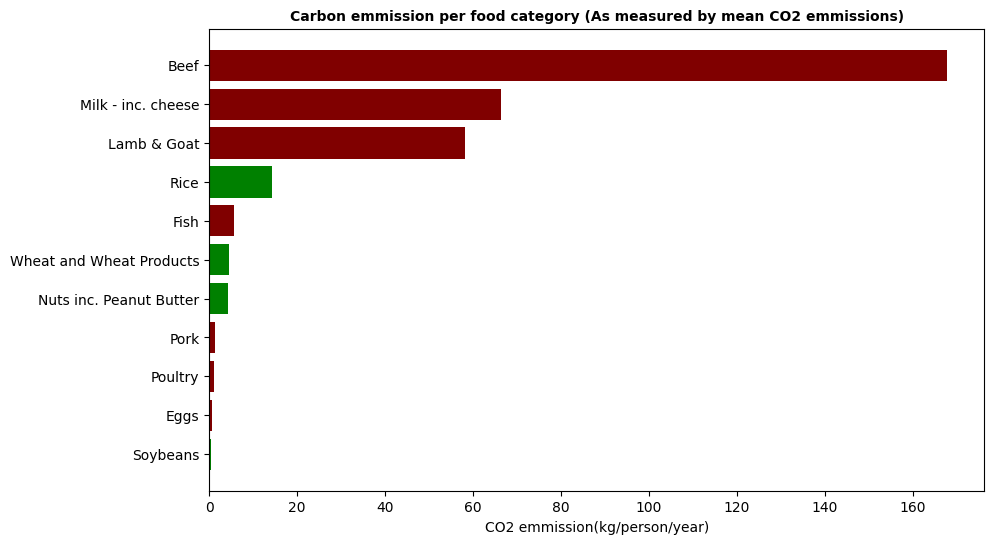

In [9]:


food=emmissions_df['food_category']
emmission=emmissions_df['co2_emmission']
colors=['green','maroon','maroon','maroon','green','green','maroon','green','maroon','maroon','maroon']

plt.figure(figsize=(10,6))
plt.barh(food,emmission, color=colors)

plt.title('Carbon emmission per food category (As measured by mean CO2 emmissions)', fontsize=10, fontweight='bold')
plt.xlabel('CO2 emmission(kg/person/year)')
plt.show()





In [ ]:
plt.savefig('food_carbon_emmission.png')

<Figure size 640x480 with 0 Axes>

# **Distribution of C02 emmissions from all food levels**

In [10]:
carbon_footprint.head(30)

,country,food_category,consumption,co2_emmission
0,Argentina,Pork,10.51,37.20
1,Argentina,Poultry,38.66,41.53
2,Argentina,Beef,55.48,1712.00
3,Argentina,Lamb & Goat,1.56,54.63
4,Argentina,Fish,4.36,6.96
5,Argentina,Eggs,11.39,10.46
6,Argentina,Milk - inc. cheese,195.08,277.87
7,Argentina,Wheat and Wheat Products,103.11,19.66
8,Argentina,Rice,8.77,11.22
9,Argentina,Soybeans,0.00,0.00


In [14]:
countries.describe()

,consumption,co2_emmission
count,44.000000,44.000000
mean,8.807727,29.486591
std,17.209862,57.709336
min,0.020000,0.020000
25%,0.580000,0.990000
50%,1.895000,2.970000
75%,7.597500,31.375000
max,94.860000,294.380000


In [20]:
emmissions_df['food_category']

0                     Soybeans
1                         Eggs
2                      Poultry
3                         Pork
4      Nuts inc. Peanut Butter
5     Wheat and Wheat Products
6                         Fish
7                         Rice
8                  Lamb & Goat
9           Milk - inc. cheese
10                        Beef
Name: food_category, dtype: object

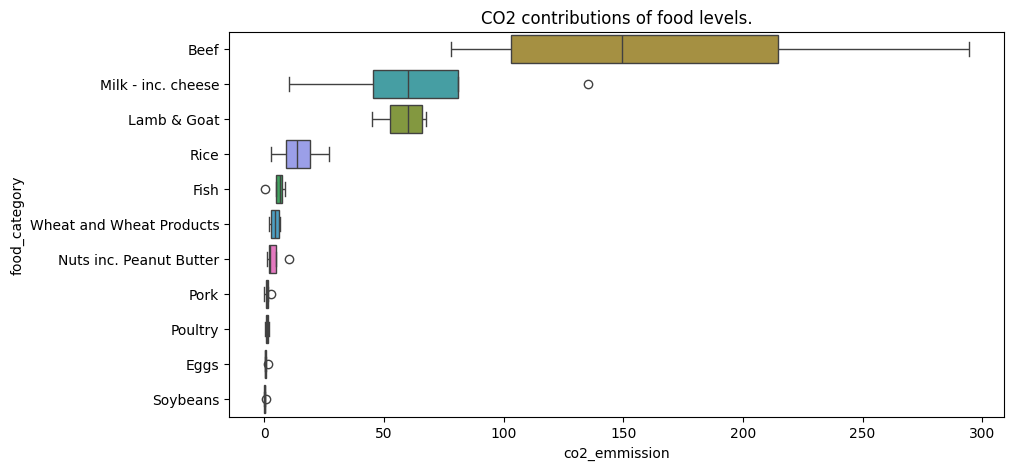

In [24]:
plt.figure(figsize=(10,5))
sns.boxplot(data=countries, x='co2_emmission',y='food_category',
            hue='food_category', legend=False, palette='husl',
            order=['Beef','Milk - inc. cheese','Lamb & Goat','Rice',
                   'Fish','Wheat and Wheat Products', 'Nuts inc. Peanut Butter',
                   'Pork','Poultry','Eggs','Soybeans',])
plt.title('CO2 contributions of food levels.')
plt.show()

# **# Top 10 Countries with highest emissions.**

In [70]:
high_emmission=carbon_footprint.groupby('country')['co2_emmission'].sum().sort_values(ascending=False).head(10).reset_index()

high_emmission['country']



0      Argentina
1      Australia
2        Albania
3    New Zealand
4        Iceland
5            USA
6        Uruguay
7         Brazil
8     Luxembourg
9     Kazakhstan
Name: country, dtype: object

In [72]:
high_country=('Argentina','Australia','Albania','New Zealand','Iceland','USA','Uruguay','Brazil','Luxembourg','Kazakhstan')

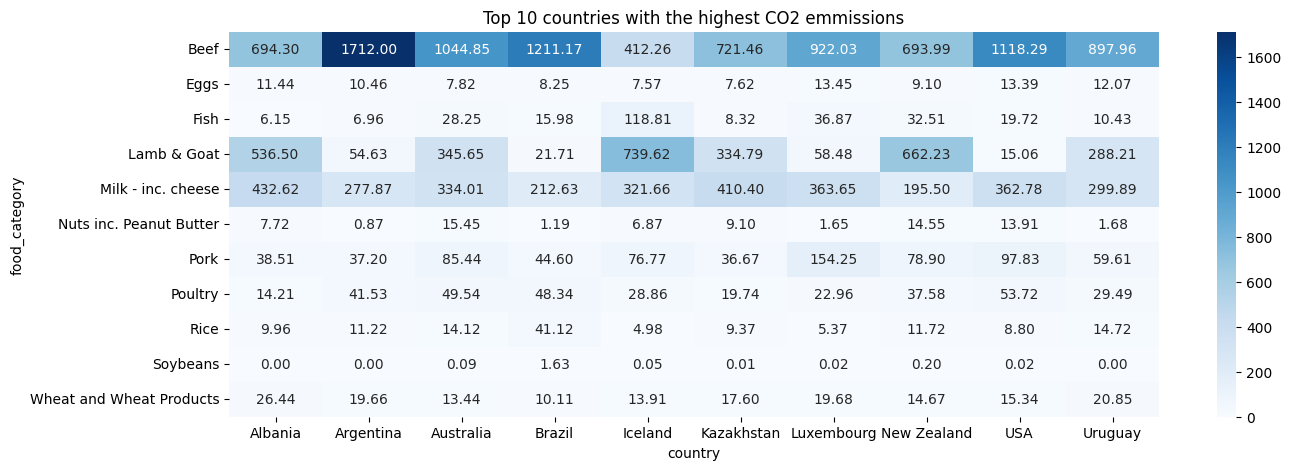

In [99]:
country=carbon_footprint[carbon_footprint['country'].isin(high_country)]
country.head(20)




plt.figure(figsize=(15,5))
data=country.pivot_table(index='food_category', columns='country', values='co2_emmission')
sns.heatmap(data, cmap='Blues',annot=True, fmt='.2f')
plt.title('Top 10 countries with the highest CO2 emmissions')


plt.savefig()
plt.show()
